In [1]:
!pip install torch
!pip install torchvision

## Simple Classifier

In [43]:
import numpy as np
import torch, torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [44]:
#Operation done to the data
transform=transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)),])

#Download the MNIST dataset if it is not already done
#Create training and testing set
trainset=datasets.MNIST(root='./data',train=True,
    download=True,transform=transform)
valset=datasets.MNIST(root='./data',train=False,
    download=True,transform=transform)


#Shuffling the training and testing set
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64, 
    shuffle=True)
valloader=torch.utils.data.DataLoader(valset,batch_size=64, 
    shuffle=True)

In [45]:
len(trainset),len(trainloader),len(valset),len(valloader)

(60000, 938, 10000, 157)

In [46]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


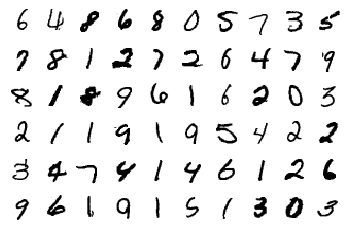

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
#Build the neural network

input_size=784
hidden_sizes=[128,64]
output_size=10

model=nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0],hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1],output_size),
    nn.LogSoftmax(dim=1)            
    )
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [10]:
criterion=nn.NLLLoss()

images,labels=next(iter(trainloader))
images=images.view(images.shape[0],-1)

logps=model(images)
loss=criterion(logps,labels) 

loss

tensor(2.3341, grad_fn=<NllLossBackward>)

In [11]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        ...,
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020]])


In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

        
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6523643819126748
Epoch 1 - Training loss: 0.28625893739780894
Epoch 2 - Training loss: 0.2190176183079828
Epoch 3 - Training loss: 0.17920274820440868
Epoch 4 - Training loss: 0.1497678596681274
Epoch 5 - Training loss: 0.1290279780047884
Epoch 6 - Training loss: 0.11182392588548505
Epoch 7 - Training loss: 0.10011383239279138
Epoch 8 - Training loss: 0.08861330091290033
Epoch 9 - Training loss: 0.08153859124695664
Epoch 10 - Training loss: 0.07463469090156638
Epoch 11 - Training loss: 0.06710031179677464
Epoch 12 - Training loss: 0.06249382006359904
Epoch 13 - Training loss: 0.0560362145278865
Epoch 14 - Training loss: 0.05236122533649222

Training Time (in minutes) = 2.7613001068433127


In [13]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)


        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9735


In [14]:
#Saving the model
torch.save(model, './my_mnist_model.pt') 

/root/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/root/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/root/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/root/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LogSoftmax. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## VAE

In [15]:
# prerequisites
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

bs = 100
# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

In [16]:
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        
        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc31 = nn.Linear(h_dim2, z_dim)
        self.fc32 = nn.Linear(h_dim2, z_dim)
        # decoder part
        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)
        
    def encoder(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc31(h), self.fc32(h) # mu, log_var
    
    def sampling(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu) # return z sample
        
    def decoder(self, z):
        h = F.relu(self.fc4(z))
        h = F.relu(self.fc5(h))
        return F.sigmoid(self.fc6(h)) 
    
    def forward(self, x):
        mu, log_var = self.encoder(x.view(-1, 784))
        z = self.sampling(mu, log_var)
        return self.decoder(z), mu, log_var

# build model
vae = VAE(x_dim=784, h_dim1= 512, h_dim2=256, z_dim=2)
if torch.cuda.is_available():
    vae.cuda()
    
vae

VAE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc31): Linear(in_features=256, out_features=2, bias=True)
  (fc32): Linear(in_features=256, out_features=2, bias=True)
  (fc4): Linear(in_features=2, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=784, bias=True)
)

In [17]:
optimizer = optim.Adam(vae.parameters())
# return reconstruction error + KL divergence losses
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

In [18]:
def train(epoch):
    vae.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        recon_batch, mu, log_var = vae(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

In [19]:
def test():
    vae.eval()
    test_loss= 0
    with torch.no_grad():
        for data, _ in test_loader:
            recon, mu, log_var = vae(data)
            
            # sum up batch loss
            test_loss += loss_function(recon, data, mu, log_var).item()
        
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

In [20]:
for epoch in range(1, 11):
    train(epoch)
    test()

/root/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 545.557461
Train Epoch: 1 [10000/60000 (17%)]	Loss: 191.355234
Train Epoch: 1 [20000/60000 (33%)]	Loss: 179.090605
Train Epoch: 1 [30000/60000 (50%)]	Loss: 169.503320
Train Epoch: 1 [40000/60000 (67%)]	Loss: 162.838096
Train Epoch: 1 [50000/60000 (83%)]	Loss: 158.751797
====> Epoch: 1 Average loss: 178.3366
====> Test set loss: 160.7404
Train Epoch: 2 [0/60000 (0%)]	Loss: 161.631055
Train Epoch: 2 [10000/60000 (17%)]	Loss: 149.225586
Train Epoch: 2 [20000/60000 (33%)]	Loss: 153.931475
Train Epoch: 2 [30000/60000 (50%)]	Loss: 162.013135
Train Epoch: 2 [40000/60000 (67%)]	Loss: 154.681104
Train Epoch: 2 [50000/60000 (83%)]	Loss: 159.317969
====> Epoch: 2 Average loss: 157.5073
====> Test set loss: 154.6671
Train Epoch: 3 [0/60000 (0%)]	Loss: 156.292646
Train Epoch: 3 [10000/60000 (17%)]	Loss: 159.908105
Train Epoch: 3 [20000/60000 (33%)]	Loss: 151.913340
Train Epoch: 3 [30000/60000 (50%)]	Loss: 150.814219
Train Epoch: 3 [40000/60000 (67%)]	Loss: 155.02

KeyboardInterrupt: 

/root/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


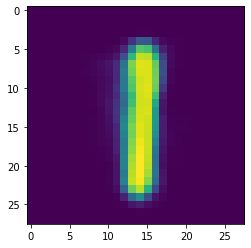

In [42]:
z = torch.randn(1, 2)
sample = vae.decoder(z)

import matplotlib.pyplot as plt
plt.imshow(sample.reshape((28,28)).detach().numpy())

In [36]:
db_list=list()

for i in range(10000):
    
    image=train_dataset[i][0]
    label=train_dataset[i][1]
    
    vector_picture=image.reshape((784,1))[:,0]
    
    mu,log_var=vae.encoder(vector_picture)
    
    
    db_row=list(mu.detach().numpy())+[label]
    db_list.append(db_row)

In [37]:
import pandas as pd
db=pd.DataFrame(db_list,columns=["z0","z1","label"])
db.head()

,z0,z1,label
0,0.407874,-2.141521,5
1,-2.315972,0.153604,0
2,0.300211,-0.195344,4
3,0.528390,2.144967,1
4,1.113462,-0.073773,9


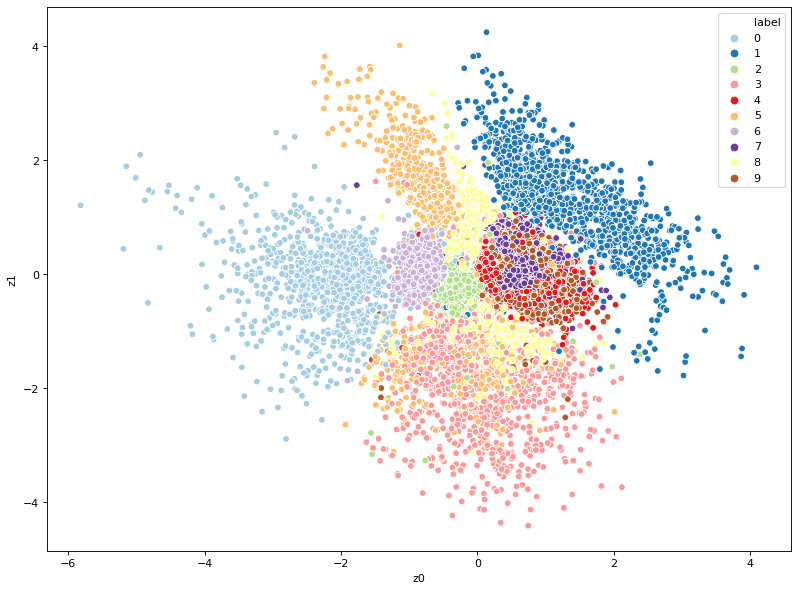

In [41]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w')
sn.scatterplot(x="z0", y="z1", hue="label", data=db,palette="Paired",legend="full")

In [39]:
db.label.value_counts()

1    1127
7    1070
3    1032
6    1014
0    1001
2     991
4     980
9     978
8     944
5     863
Name: label, dtype: int64

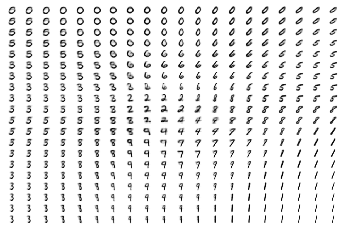

In [78]:
figure = plt.figure()
num_of_images = 60
for z0 in range(20):
    for z1 in range(20):
        plt.subplot(20, 20, z0*20+z1+1)
        plt.axis('off')
        
        image=vae.decoder(torch.tensor([[float(-2+4*z0/20),float(-2+4*z1/20)]]))
        
        plt.imshow(image.reshape((28,28)).detach().numpy(), cmap='gray_r')